In [1]:
!pip install app_store_scraper 

     --------------------------------------- 58.4/58.4 kB 60.5 kB/s eta 0:00:00
     --------------------------------------- 58.8/58.8 kB 74.0 kB/s eta 0:00:00
     ------------------------------------ 128.0/128.0 kB 147.7 kB/s eta 0:00:00
     ------------------------------------ 133.4/133.4 kB 197.0 kB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.14
    Uninstalling urllib3-1.26.14:
      Successfully uninstalled urllib3-1.26.14
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
jupyterlab-server 2.19.0 requires requests>=2.28, but you have requests 2.23.0 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.23.0 which is incompatible.
anaconda-client 1.11.2 requires urllib3>=1.26.4, but you have urllib3 1.25.11 which is incompatible.


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
### Scraping Data

In [4]:
import pandas as pd
import numpy as np
import json

from app_store_scraper import AppStore
slack = AppStore(country='id', app_name='gojek', app_id = '944875099')

slack.review(how_many=50000)

2023-06-18 12:26:51,637 [INFO] Base - Initialised: AppStore('id', 'gojek', 944875099)
2023-06-18 12:26:51,637 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/id/app/gojek/id944875099
2023-06-18 12:26:56,987 [INFO] Base - [id:944875099] Fetched 220 reviews (220 fetched in total)
2023-06-18 12:27:03,319 [INFO] Base - [id:944875099] Fetched 400 reviews (400 fetched in total)
2023-06-18 12:27:09,682 [INFO] Base - [id:944875099] Fetched 580 reviews (580 fetched in total)
2023-06-18 12:27:15,534 [INFO] Base - [id:944875099] Fetched 780 reviews (780 fetched in total)
2023-06-18 12:27:21,879 [INFO] Base - [id:944875099] Fetched 940 reviews (940 fetched in total)
2023-06-18 12:27:28,679 [INFO] Base - [id:944875099] Fetched 1080 reviews (1080 fetched in total)
2023-06-18 12:27:35,022 [INFO] Base - [id:944875099] Fetched 1260 reviews (1260 fetched in total)
2023-06-18 12:27:40,587 [INFO] Base - [id:944875099] Fetched 1460 reviews (1460 fetched in total)
2023-06-18 12:27:46,210 [

In [5]:
slack.reviews

[{'date': datetime.datetime(2017, 9, 11, 12, 10, 16),
  'review': 'Good',
  'rating': 5,
  'isEdited': False,
  'userName': 'Jrsugianto',
  'title': 'Awesome'},
 {'date': datetime.datetime(2018, 11, 9, 11, 16, 25),
  'review': 'Kenapa tidak ada opsi login with email??? Tolong ditambahkan opsi ini jika nomer hp hilang dan memerlukan login cepat untuk menggunakan aplikasi. Saya hilang handphone dan harus register new account karena akun lama harus login with phone number sedangkan saat itu malam hari dan belum bisa ke gerai provider. Padahal gopay masih di akun yang hilang bersama handphone saya. Trims.',
  'rating': 4,
  'isEdited': False,
  'userName': 'Ibrow14',
  'title': 'Login with Email'},
 {'date': datetime.datetime(2019, 5, 18, 9, 11, 13),
  'review': 'Beberapa minggu ini jadi sering force close, ga bisa sama sekali masuk ke aplikasi. Klo low power mode dimatiin, baru bisa masuk. Bintang 1 :)',
  'rating': 1,
  'isEdited': False,
  'userName': 'kekentalan',
  'title': 'Force clo

In [7]:
df_baru = pd.DataFrame(np.array(slack.reviews),columns=['review'])
df_baru = df_baru.join(pd.DataFrame(df_baru.pop('review').tolist()))
df_baru.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2017-09-11 12:10:16,Good,5,False,Jrsugianto,Awesome,NaN
1,2018-11-09 11:16:25,Kenapa tidak ada opsi login with email??? Tolo...,4,False,Ibrow14,Login with Email,NaN
2,2019-05-18 09:11:13,"Beberapa minggu ini jadi sering force close, g...",1,False,kekentalan,Force close di iPhone 6 Low Power Mode,NaN
3,2020-01-11 05:56:18,"1. Go mart nya kok di hilangin kenapa sih, udh...",1,False,Valence5,Gojek kamu telah berubah... :(,NaN
4,2019-10-06 10:07:21,Perusahaan dengan CS paling NAJIS sedunia 👎🏿,1,False,Fadleyz,Ganti nomor kok ribet banget,NaN


In [8]:
len(df_baru.index)

9640

In [9]:
df_baru[['rating','review']].head()

,rating,review
0,5,Good
1,4,Kenapa tidak ada opsi login with email??? Tolo...
2,1,"Beberapa minggu ini jadi sering force close, g..."
3,1,"1. Go mart nya kok di hilangin kenapa sih, udh..."
4,1,Perusahaan dengan CS paling NAJIS sedunia 👎🏿


In [11]:
new_df = df_baru[['rating','review']]
new_df.head()

,rating,review
0,5,Good
1,4,Kenapa tidak ada opsi login with email??? Tolo...
2,1,"Beberapa minggu ini jadi sering force close, g..."
3,1,"1. Go mart nya kok di hilangin kenapa sih, udh..."
4,1,Perusahaan dengan CS paling NAJIS sedunia 👎🏿


In [12]:
### Pelabelan

In [13]:
def labelling(score):
    if score <3:
        return 'Negatif'
    elif score == 4 :
        return 'Positif'
    elif score == 5 :
        return 'Positif'
new_df['label'] = new_df ['rating'].apply(labelling)
new_df.head(100)

C:\Users\rifai\AppData\Local\Temp\ipykernel_388\1750711264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label'] = new_df ['rating'].apply(labelling)


,rating,review,label
0,5,Good,Positif
1,4,Kenapa tidak ada opsi login with email??? Tolo...,Positif
2,1,"Beberapa minggu ini jadi sering force close, g...",Negatif
3,1,"1. Go mart nya kok di hilangin kenapa sih, udh...",Negatif
4,1,Perusahaan dengan CS paling NAJIS sedunia 👎🏿,Negatif
...,...,...,...
95,1,Saya meminta bantuan karena pesanan tdk sesuai...,Negatif
96,1,Pesan makanan 2 jam dengan problem tidak menem...,Negatif
97,1,The service system at Gojek is very bad and ma...,Negatif
98,1,Sudah bayar gopaylater tapi tidak terverifikas...,Negatif


In [14]:
new_df = new_df[['review', 'label']]

In [15]:
new_df.head()

,review,label
0,Good,Positif
1,Kenapa tidak ada opsi login with email??? Tolo...,Positif
2,"Beberapa minggu ini jadi sering force close, g...",Negatif
3,"1. Go mart nya kok di hilangin kenapa sih, udh...",Negatif
4,Perusahaan dengan CS paling NAJIS sedunia 👎🏿,Negatif


In [16]:
### Data Cleaning

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9640 non-null   object
 1   label   9263 non-null   object
dtypes: object(2)
memory usage: 150.8+ KB


In [18]:
new_df.isna()

,review,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
9635,False,False
9636,False,False
9637,False,False
9638,False,False


In [19]:
new_df.isna().any()

review    False
label      True
dtype: bool

In [20]:
new_df.isnull().sum()

review      0
label     377
dtype: int64

In [21]:
new_df.dropna(subset=['label'],inplace = True)

In [22]:
new_df.isnull().sum()

review    0
label     0
dtype: int64

In [23]:
new_df.head(100)

,review,label
0,Good,Positif
1,Kenapa tidak ada opsi login with email??? Tolo...,Positif
2,"Beberapa minggu ini jadi sering force close, g...",Negatif
3,"1. Go mart nya kok di hilangin kenapa sih, udh...",Negatif
4,Perusahaan dengan CS paling NAJIS sedunia 👎🏿,Negatif
...,...,...
99,di instruksi tidak seperti yg sebenarnya,Negatif
100,Mau chat cs malah chat sama robot,Negatif
101,Bisa-bisanya akun gojek punya CS super lelet d...,Negatif
102,Ko makin ribet ya.. mau masuk akun lewat verif...,Negatif


In [24]:
new_df.to_csv("data_review_gojek_appstore.csv", index = False) #simpan hasil file data cleaning

In [25]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from numpy import array
from sklearn.model_selection import train_test_split

from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
data = pd.read_csv('data_review_gojek_appstore.csv')
data.head(100)

,review,label
0,Good,Positif
1,Kenapa tidak ada opsi login with email??? Tolo...,Positif
2,"Beberapa minggu ini jadi sering force close, g...",Negatif
3,"1. Go mart nya kok di hilangin kenapa sih, udh...",Negatif
4,Perusahaan dengan CS paling NAJIS sedunia 👎🏿,Negatif
...,...,...
95,di instruksi tidak seperti yg sebenarnya,Negatif
96,Mau chat cs malah chat sama robot,Negatif
97,Bisa-bisanya akun gojek punya CS super lelet d...,Negatif
98,Ko makin ribet ya.. mau masuk akun lewat verif...,Negatif


In [28]:
# convert label

y = [ 0 if i=='Negatif' else 1 for i in data ['label']]
x = data['review']
print(x[:10], y[:10])

0                                                 Good
1    Kenapa tidak ada opsi login with email??? Tolo...
2    Beberapa minggu ini jadi sering force close, g...
3    1. Go mart nya kok di hilangin kenapa sih, udh...
4         Perusahaan dengan CS paling NAJIS sedunia 👎🏿
5    Promo di hp tiap ornag beda, ada yg ada promon...
6    Go news anda ga penting, banyak berita tak ber...
7               Makin kesini makin jelek banget yaa 😭😭
8    Tiba2 ngga bisa dibuka,udah coba uninstal inst...
9                     Setiap dibuka appnya keluar lagi
Name: review, dtype: object [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
#split data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0  651]
 [   1 2128]]


In [31]:
#### Model Configuration

In [32]:
vocab_size = 3000
embedding_dim = 16
max_length = 20
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""

In [33]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x)

sekuens_train = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_test = pad_sequences(sekuens_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

padded_train = np.array(padded_train)
label_train = np.array(y_train)

padded_test = np.array(padded_test)
label_test = np.array(y_test)

In [34]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(padded_train, label_train, epochs=20,
                   batch_size=32, validation_data=(padded_test, label_test),
                   steps_per_epoch=10, verbose=2)

Epoch 1/20
10/10 - 4s - loss: 0.6632 - accuracy: 0.7875 - val_loss: 0.6204 - val_accuracy: 0.7657 - 4s/epoch - 396ms/step
Epoch 2/20
10/10 - 0s - loss: 0.5409 - accuracy: 0.7500 - val_loss: 0.4618 - val_accuracy: 0.7657 - 431ms/epoch - 43ms/step
Epoch 3/20
10/10 - 0s - loss: 0.4444 - accuracy: 0.7594 - val_loss: 0.4172 - val_accuracy: 0.7657 - 444ms/epoch - 44ms/step
Epoch 4/20
10/10 - 0s - loss: 0.3959 - accuracy: 0.7812 - val_loss: 0.3855 - val_accuracy: 0.8035 - 467ms/epoch - 47ms/step
Epoch 5/20
10/10 - 0s - loss: 0.3660 - accuracy: 0.8250 - val_loss: 0.3696 - val_accuracy: 0.8370 - 447ms/epoch - 45ms/step
Epoch 6/20
10/10 - 0s - loss: 0.3409 - accuracy: 0.8562 - val_loss: 0.3570 - val_accuracy: 0.8370 - 440ms/epoch - 44ms/step
Epoch 7/20
10/10 - 0s - loss: 0.3245 - accuracy: 0.8813 - val_loss: 0.3482 - val_accuracy: 0.8417 - 446ms/epoch - 45ms/step
Epoch 8/20
10/10 - 0s - loss: 0.3312 - accuracy: 0.8500 - val_loss: 0.3305 - val_accuracy: 0.8499 - 435ms/epoch - 44ms/step
Epoch 9/20

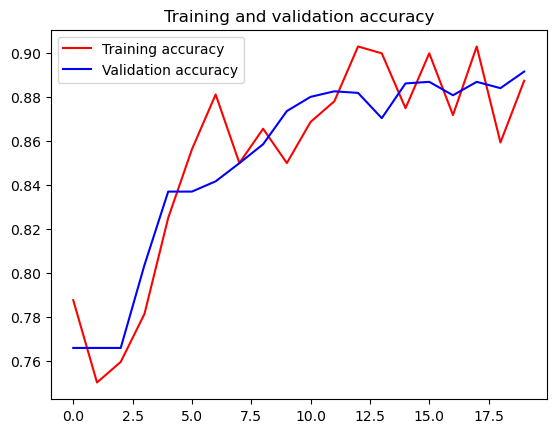

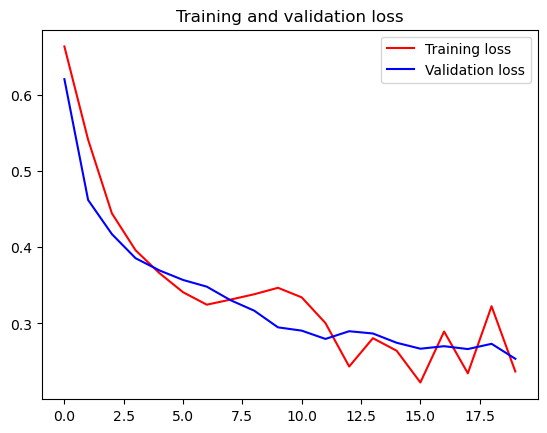

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
### Confusion Matrix

In [38]:
y_pred = np.rint(model.predict(padded_test))
y_pred

87/87 [==============================] - 1s 4ms/step


array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [39]:
cm = tf.math.confusion_matrix(labels=label_test, predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 531,  120],
       [ 181, 1947]])>

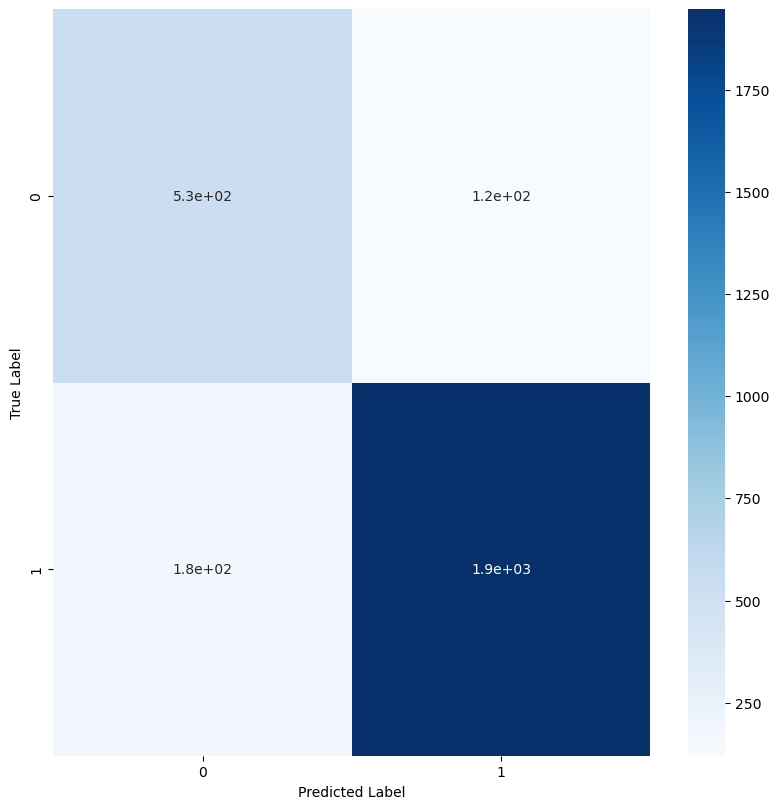

In [40]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
ax = plt.subplot()
data = np.asarray(cm).reshape(2,2)

sns.heatmap(data, annot=True, cmap=plt.cm.Blues, ax=ax)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [41]:
### Pengujian Sentimen Menggunakan Model

In [42]:
# test sentimen
sentence = ['gojek sangat membantu dan sangat bermanfaat']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(np.rint(model.predict(padded)))

1/1 [==============================] - 0s 28ms/step
[[1.]]
